# Pasos iniciales

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random

In [3]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Orga Datos/tp0 y tp1/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [4]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0.2, 1, 15)
colores = cmap(saltos)


# Conversion a dolar

In [5]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = entrenamiento['Total_Amount']*0.0096
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

In [6]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = entrenamiento['Total_Amount']*1.17
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

In [7]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = entrenamiento['Total_Amount']*0.70
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

In [8]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = entrenamiento['Total_Amount']*1.29
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

# Filtrando

In [9]:
df = entrenamiento[['Territory', 'Total_Amount']]
df

,Territory,Total_Amount
0,None,6169176.00
1,None,56429.10
2,NW America,83865.60
3,NW America,7421881.50
4,NW America,13357192.50
...,...,...
16942,Austria,120919.50
16943,Austria,108827.55
16944,Austria,120919.50
16945,NE America,2346796.88


In [10]:
max_amounts = df.groupby('Territory').agg({'Total_Amount':'sum'})
max_amounts


,Total_Amount
Territory,
Albania,4.517159e+06
Armenia,2.269141e+07
Australia,2.402488e+09
Austria,2.171008e+07
Belarus,2.098295e+07
...,...
UAE (Dubai),1.801713e+08
UAE (Others),7.539721e+05
Ukraine,1.741587e+07


In [11]:
top_max_amounts = max_amounts.nlargest(10, 'Total_Amount')
top_max_amounts_sin_none = max_amounts[ max_amounts.index != 'None' ].nlargest(10, 'Total_Amount')
print(top_max_amounts)
top_max_amounts_sin_none

                Total_Amount
Territory                   
Australia       2.402488e+09
NW America      2.161057e+09
SE America      2.057781e+09
None            1.946274e+09
NE America      1.637583e+09
Germany         1.393468e+09
India           7.895088e+08
France          4.963776e+08
SW America      4.852769e+08
United Kingdom  3.862590e+08


,Total_Amount
Territory,
Australia,2.402488e+09
NW America,2.161057e+09
SE America,2.057781e+09
NE America,1.637583e+09
Germany,1.393468e+09
India,7.895088e+08
France,4.963776e+08
SW America,4.852769e+08
United Kingdom,3.862590e+08


# Graficando

## Con No_especificado

In [12]:
top_max_amounts = top_max_amounts.reset_index()
top_max_amounts = top_max_amounts.replace(to_replace='None', value='No_especificado')
top_max_amounts

,Territory,Total_Amount
0,Australia,2.402488e+09
1,NW America,2.161057e+09
2,SE America,2.057781e+09
3,No_especificado,1.946274e+09
4,NE America,1.637583e+09
5,Germany,1.393468e+09
6,India,7.895088e+08
7,France,4.963776e+08
8,SW America,4.852769e+08
9,United Kingdom,3.862590e+08


Text(0, 0.5, 'Territorios')

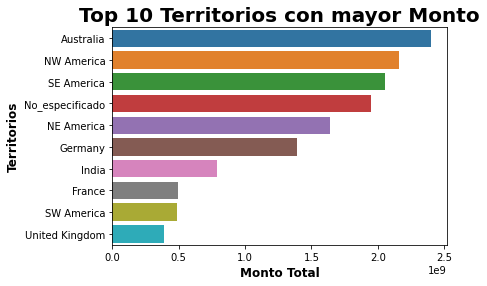

In [13]:
g = sns.barplot(x=top_max_amounts['Total_Amount'], y=top_max_amounts['Territory'], orient='h')
g.set_title("Top 10 Territorios con mayor Monto", fontsize=20, fontweight='bold')
g.set_xlabel("Monto Total", fontsize=12, fontweight='bold')
g.set_ylabel("Territorios", fontsize=12, fontweight='bold')

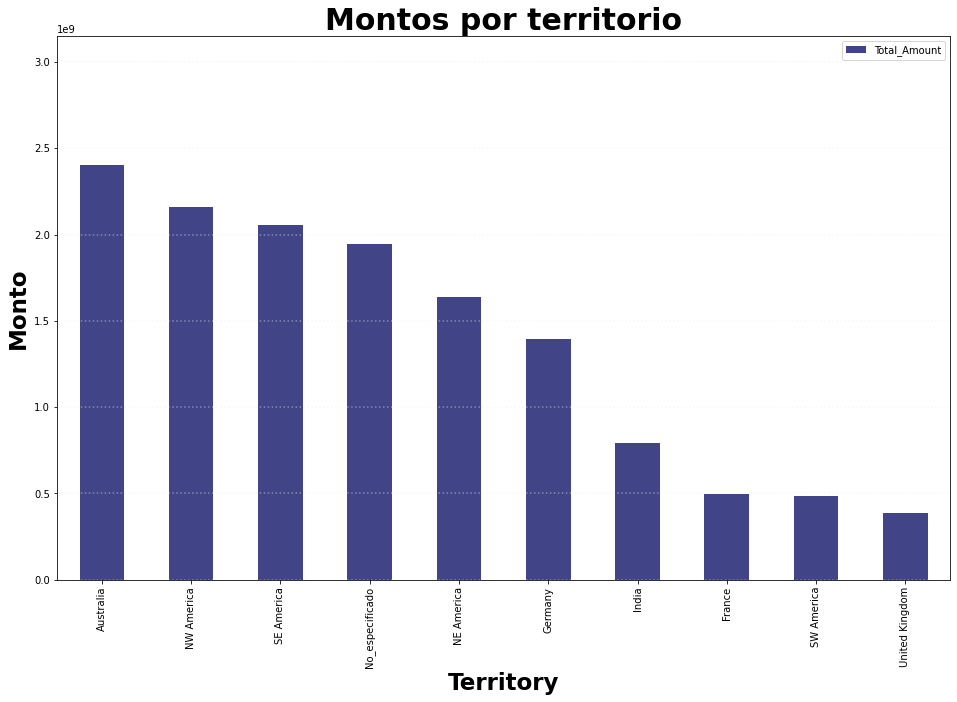

In [16]:

grafico = top_max_amounts.plot(kind='bar', x='Territory',figsize=(16,10), color=colores)
plt.title('Montos por territorio', fontsize=30, fontweight='bold')
ax = plt.gca()
ax.set_ylabel('Monto',fontsize=23, fontweight='bold')
ax.set_xlabel('Territory', fontsize=23, fontweight='bold')

lineas = grafico.get_yticks()
for i in lineas:
      grafico.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

## Sin No_especificado

Text(0, 0.5, 'Territorios')

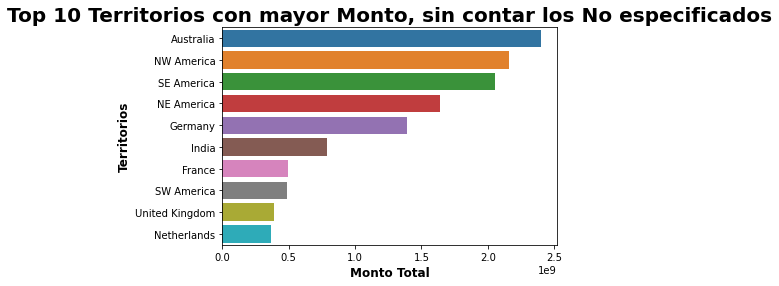

In [15]:
top_max_amounts_sin_none = top_max_amounts_sin_none.reset_index()
g = sns.barplot(x=top_max_amounts_sin_none['Total_Amount'], y=top_max_amounts_sin_none['Territory'], orient='h')
g.set_title("Top 10 Territorios con mayor Monto, sin contar los No especificados", fontsize=20, fontweight='bold')
g.set_xlabel("Monto Total", fontsize=12, fontweight='bold')
g.set_ylabel("Territorios", fontsize=12, fontweight='bold')